<a href="https://colab.research.google.com/github/Pellizzari/Tarea0-INF393-II-2019/blob/master/Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>

<H5 align='center'>Giorgio Pellizzari Águila <br> Cristian Vallejos Pérez</H5> </H4>


<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

**Resolución:**

La función implementada a continuación permite predecir un valor de salida $0\;ó\;1$, a partir de un patrón de entrada $x$ y los correspondientes pesos $w$ de modelo. Desde este punto, se ha decidido incluir los bias dentro del vector $\vec{w}$, por lo que la entrada $x$ debe incluir un vector columna $\vec{1}$ al final.

In [0]:
import numpy as np

def predict(inputs):
  comb = np.dot(inputs, weights)
  if comb > 0:
    prediction = 1
  else:
    prediction = 0
  return prediction

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

**Resolución:**

La siguiente clase (*Perceptron*) implementa el algoritmo del Perceptrón, utilizando la función predictora implementada en la parte *a)*. Asimismo, se incluye una función de entrenamiento que utiliza dicha función predictora para actualizar el vector $\vec{w}$ a partir de cada instancia del dataset que se entregue al Perceptrón para su entrenamiento.

Por último, la clase *Perceptron* incluye un atributo *iterations* para permitir que el Perceptrón aprenda tras $T$ repeticiones de su algoritmo; y un atributo *learning_rate*, el cual permitirá amortiguar las modificaciones a los distintos valores del vector $\vec{w}$, siempre y cuando el valor predicho en la i-ésima iteración difiera del valor esperado.

In [0]:
class Perceptron(object):
    # Constructor del Perceptrón. 
    #   Recibe como parámetro la cantidad de columnas "no_of_inputs" del dataset de entrenamiento.
    def __init__(self, no_of_inputs, iterations=1, learning_rate=0.01, output=[], acc=[]):
      self.iterations = iterations
      self.learning_rate = learning_rate
      self.weights = np.zeros(no_of_inputs)
      self.output = output
      self.acc = list()
           
    # Función de predicción. 
    #   Recibe como parámetro un vector fila del dataset y un índice i.
    #   Retorna el valor de salida 0 ó 1, tras verificar el resultado del producto punto.
    #   Además, registra dicho valor de salida en una lista de outputs.
    def predict(self, inputs, i):
      comb = np.dot(inputs, self.weights)
      if comb > 0:
        prediction = 1
      else:
        prediction = 0
      self.output.append(prediction)
      return prediction
           
    # Función de entrenamiento. 
    #   Recibe como parámetro la data de entrenamiento y los resultados esperados para cada instancia del conjunto.
    #   No tiene retorno. Su implementación es utilizada para actualizar el vector de pesos tras cada instancia
    #   i del dataset. Asimismo, se calcula el accuracy del modelo tras cada una de éstas y se registra en una lista.
    def train(self, training_inputs, labels):
      for _ in range(self.iterations):
        for inputs, label in zip(training_inputs, labels):
          prediction = self.predict(inputs, i)
          self.weights += self.learning_rate * (label - prediction) * inputs
          self.acc.append(accuracy_score(labels[0:len(self.output)], self.output, normalize=True))

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo:</div>

**Resolución:**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Se carga el dataset y se separa en input y output
dataset = load_breast_cancer()
X = dataset.data; y = dataset.target

# Se fragmenta la data en dos conjuntos: 1) entrenamiento y 2) pruebas.
# Estos, a su vez, se separan en data entrante y data resultante.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123456)

# Se traduce el conjunto de entrenamiento resultante en una lista.
y_trained = []
for i in y_train:
  y_trained.append(i)

# Se normalizan los datos del conjunto de entrenamiento entrante, agregando,
# además, una columna de 1s que permita incluir el bias dentro del vector de pesos.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(len(X_train))]

Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

**Resolución:**

In [23]:
# Se entrena el Perceptrón y se calcula el accuracy final del modelo tras 1 iteración/epoch.
from time import time
p = Perceptron(len(X_train[0]))
start_time=time()
p.train(X_train, y_trained)
elapsed_time=time()-start_time
print("Tiempo de ejecución: %10f segundos" %elapsed_time)
print("Accuracy final: %10f" %accuracy_score(y_trained, p.output, normalize=True))
print(p.weights)

Tiempo de ejecución:   0.121477 segundos
Accuracy final:   0.952261
[-0.01462052 -0.01463612 -0.01506946 -0.01446882 -0.01019205 -0.00401518
 -0.00892041 -0.01739891  0.00324545  0.0083001  -0.02194057 -0.02549721
 -0.01571235 -0.02107847 -0.00400347  0.02241383  0.00854457 -0.01167628
  0.01898228  0.0130102  -0.02903338 -0.03718901 -0.02683495 -0.02716439
 -0.03036654 -0.00265024 -0.01638471 -0.03277402  0.00225211 -0.01077784
  0.01      ]


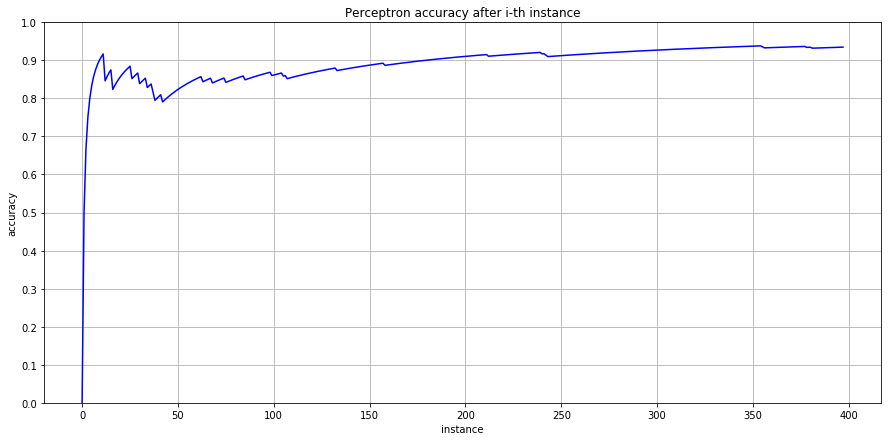

In [0]:
import matplotlib.pyplot as plt

# Se grafica el accuracy del modelo tras cada instancia del conjunto de datos de entrenamiento
x = [x for x in range(len(p.acc))]

plt.figure(figsize=(15, 7)); plt.ylim(0, 1)
plt.plot(x, p.acc, color='b')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('instance'); plt.ylabel('accuracy')
plt.title('Perceptron accuracy after i-th instance')
plt.grid(True)

plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

**Resolución:**

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

**Resolución:**

### ¿Qué sucede al variar la función objetivo del problema? 

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

**Resolución:**

Debido al overflow causado cuando $\xi \notin\,]-710,710[\,$, se ha tomado la determinación de acotar la función sigmoidal de la siguiente manera:

$$
  \sigma(\xi) = 
     \begin{cases}
       1 & :\quad\text{if}\;\xi \le -710\\
       \frac{1}{1+e^{-\xi}} & :\quad\text{if}\;-710 \gt \xi \lt 710\\
       0 & :\quad\text{if}\;\xi \gt 709\\
     \end{cases}
$$

In [0]:
# Función sigmoidal, acotada en -709 <= x <= 709.
def sigmoidal(xi):
  if xi <= -710:
    return 1.0
  elif xi > 709:
    return 0.0
  return 1/(1+np.exp(xi))

# Nueva función de predicción, la cual incluye la sigmoidal anterior.
def predict(inputs):
  return sigmoidal(np.dot(inputs, weights))

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [0]:
# Función de pérdida
def loss(y_values, sigmoid_func):
  return np.dots(-y, np.log(sigmoid_func)) - (1-y)

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  